# <u> Creation of a Petroleum Database

Make sure Python and pip are installed. Install all packages listed below. Import all programs used for the creation of the database. 

In [3]:
#import programs

#import mysql.connector as sql
import pandas as pd
import pubchempy as pub
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
import numpy as np
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
#from mordred import AtomCount as atomcount
#import collections as c
import matplotlib
import matplotlib.pyplot as plt
import rdkit.Chem.Crippen as crip
from rdkit.Chem import rdPartialCharges
from rdkit.Chem import rdqueries
from rdkit.Chem import rdEHTTools
#import pymysql

Molecules found in three papers are uploaded to a database using the following workflow. 

The papers are cited, here:

Paper 1: Zhang, Y.; Schuler, B.; Fatayer, S.; Gross, L.; Harper, M. R.; Kushnerick, J. D. Understanding the Effects of Sample Preparation on the Chemical Structures of Petroleum Imaged with Noncontact Atomic Force Microscopy. Industrial & Engineering Chemistry Research 2018, 57 (46), 15935-15941. DOI: 10.1021/acs.iecr.8b03962.

Paper 2: Schuler, B.; Meyer, G.; Peña, D.; Mullins, O. C.; Gross, L. Unraveling the Molecular Structures of Asphaltenes by Atomic Force Microscopy. Journal of the American Chemical Society 2015, 137 (31), 9870-9876. DOI: 10.1021/jacs.5b04056.

Paper 3: Chen, P.; Metz, J. N.; Mennito, A. S.; Merchant, S.; Smith, S. E.; Siskin, M.; Rucker, S. P.; Dankworth, D. C.; Kushnerick, J. D.; Yao, N.; et al. Petroleum pitch: Exploring a 50-year structure puzzle with real-space molecular imaging. Carbon 2020, 161, 456-465. DOI: https://doi.org/10.1016/j.carbon.2020.01.062.

## Step 1: Create smiles for compounds 1-29

Compounds 1 through 29 come from Paper1, Chart 2

Compounds are drawn in ChemDraw and the respective SMILES codes are copied

com# = smiles for compound # with respect to chart 2

In [2]:
doi1 = 'https://doi.org/10.1021/acs.iecr.8b03962';
com1 = 'CC1=C(C=CC2=C3C=CC=C2)C3=C4C5=C1C=CC(C5=C6S4)=CC7=C6C8=C(C=C7)C9=CC%10=CC=CC=C%10C%11=C9C8=CC=C%11';
com2 = 'CC1=C2C(C3=C(C4=C5C=C6)C6=C2)=C(C=CC3=CC4=CC=C5)C=C1';
com3 = 'CC1=C2C(C(C=CC3=C4C5=C6C7=C3C=CC=C7C=C(C)C6=CC=C5)=C4S2)=CC=C1';
com4 = 'CC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=CC=CC=C42';
com5 = 'CC1=CC2=CC=C3C4C2C(C5=CC4=CC=C3)=C1NC(C5=C6)=C7C=CC8=CC=CC9=C8C7=C6C=C9';
com6 = 'C12=CC(C=CC3=C4C(C5=C6)=C(C(C=C5)=CC=C7)C7=C3)=C4C6=C1C=CC=C2';
com7 = 'CC1=CC=CC2=C1CC3=CC(C)=CC=C32';
com8 = 'O=C1C2=CC=CC3=C2C4=C(C=C3)C=CC5=C4C1=C6C(C(C)=CC=C6)=C5';
com9 = 'CC1=CC2=C3C(C4=C5C(C6=CC=CC=C6C7=C5C3=C1N7)=CC=C4)=CC=C2';
com10 = 'CC(C1=C2C3=CC4=C(C=CC=C4)C(C)=C3C=C1)=CC5=C2C=C6C(C=CC=C6)=C5';
com11 = 'CC1=C2C(C=C(C(C3=C4C5=C6C=C7C(C=CC=C7)=C5C=CC4=CC=C3)=C6S8)C8=C2)=C(C)C=C1';
com12 = 'CC1=C2C3=C(C=C1)C4=CC=CC5=C4C(C3=C(C2)C=C6)=C6C=C5';
com13 = 'CC1=C(C=CC=C2)C2=CC3=C1C=CC4=CC5=C(C(C=CC=C6)=C6C5)C=C43';
com14 = 'CC1=CC(C)=CC2=CC(C)=CC=C21';
com15 = 'CC1=C2C(C=C(C=C3C4=C5C=CC=C4C6=C3C=C(C7=CC=C(C=C(C)C=C8)C8=C7)C=C6)C5=C2)=CC=C1';
com16 = 'C12=CC3=CC(CC4)=C(C4=C(C=C(CCC5)C5=C6)C6=C7)C7=C3C=C1C=CC=C2';
com17 = 'CC1=CC=CC2=C1SC3=C2C=CC4=C3C5=CC=CC(C)=C5C4';
com18 = 'CC1=CC=CC2=C1CC3=C2C=C4C5=C(C(C)=CC=C5)C=C6C4=C3C7=C6C=C8C(C9=C%10C8=CC=C%11C%10=C(SC%12=C%11C=CC=C%12C)C=C9)=C7C';
com19 = 'CC1=C(C)C=C2C(C=CC=C2C)=C1';
com20 = 'CC1=CC2=C3C4=C5C6=C2C(C1=C(C)C=C7)=C7C8=CC9=C(C(C%10=C5SC4=CC=C3)=C86)C%11=C(C%10=CC=C%12C)C%12=CC%13=C%11C(C9=CC=C%14)=C%14C=C%13';
com21 = 'CC(C=C1)=CC2=C1C3=C(C2)C(C)=C4C5=C(C6=C4C=C7C(C(C)=CC=C7)=C6)C=CC=C35';
com22 ='CC1=C(C)C2=CC3=C4C(C=C(C)C=C4)=CC(CC5)=C3C5=C2C=C1C';
com23 = 'CC1C2=CC3=C(C(C=CC(C)=C4)=C4C3)C5=C2C6=C(C=C(C(C)=CC(C7=C8C9=C(C=CC(C)=C9)C%10=C7C=CC=C%10)=C%11C8=O)C%11=C6C5)C1';
com24 = 'CC1=C(C)C=C(C)C=C1';
com25 ='CC1=CC=C(C=C2)C(C3=C2C4=C(C3)C(C)=C5C(C(C=C(C=C(C)C(C)=C6)C6=C7)=C7C5)=C4)=C1';
com26 = 'CC1=CC2=C(C3=C1CC4=C3C=C(C=CC5=C6C=C7C(CCC7)=C5)C6=C4)C=CC8=C2C=CC=C8';
com27 = 'CC1=CC=CC2=C1SC3=C2C=C4C(C5=CC=C4)=C3C=C6C5=CC(C7=C6)=C(C=C8)C9=C7C=CC%10=CC=CC8=C%109';
com28 = 'CC1=C(C=CC2=C3C=CC4=C2SC=C4)C3=CC(C)=C1C';
com29 = 'CC1=CC2=CC=CC(C)=C2C=C1C';

In [3]:
#create smiles list
smile_list_1 = [com1, com2, com3, com4, com5, com6, com7, com8, com9, 
          com10, com11, com12, com13, com14, com15, com16, com17, com18,
          com19, com20, com21, com22, com23, com24, com25, com26, com27, 
          com28, com29]

In [4]:
#  Create smiles list with new molecules

doi2 = 'https://doi.org/10.1021/jacs.5b04056'; 
CA1 = 'CC1=CC2=C(C3=C4C(C=CC5=C4C2=CC=C5)=CC6=C3C7=C(C=CC=C78)C=C6)C8=C1'; 
CA2 = 'CC1=CC2=C(C=C1)C3=C(C4=CC5=C3C=CC=C5)C(C6=CC(C=CC7=CC=CC(C=C8)=C79)=C9C8=C64)=C2'; 
CA3 = 'CC1=CC2=CC3=C4C5=C(C=C3)C6=C([CH-]7)C8=C(C9=CC=CC%10=C9C(C(C8=C7C=C%11)=C%11C=C%12)=C%12C%10)C=C6C=C5CC4=C2C=C1'; 
CA15 = 'C12=CC(C3=CC4=C(CC5=C6C=CC7=C5C=CC=C7)C6=C8C9=C4C%10=C3C%11=C%12C=CC=C%11C=C%10C=C9C%13=CC%14=C(C(C=CC=C%15)=C%15C=C%14)C=C8%13)=C%12C=C1C=CC=C2';
CA21 = 'C12=CC=CC3=C1C4=C(C(C=CC=C5)=C5C=C4C3)C=C2';
CA7 = 'CC1=CC2=C(C3=C(C(C4=CC=CC5=C4C6=CC=C5)=CC7=C3C8=C2C=CC=C8C=C7)C6=C9)C9=C1'; 
CA16 = 'C1(C=CC2=C3C=CC4=C2C(C=C(C(C=C(C5=CC6=C(C(C(C=C7)=CC=C8)=C8C=C6)C7=C5)C=C9)=C9C=C%10)C%10=C%11)=C%11C4)=C3C=CC=C1';
CA22 = 'C12=C(C(C(C(C=C3)=C2)=C(C3=CC4=C5C=CC=C4)C5=C6)=C6C=C7)C7=CC=C1';
CA6 = 'C1(C2=C3C(C4=C(C5=C6C=C7)C(C8=C9C%10=C%11C=CC%12=C%10C%13=C(C=CC=C%13C%14=CC=CC=C%14%12)C9=CC%15=C8C5=C7C=C%15)=C%11C=C4%16)=C6C=C2)=C(C%17=C3C%16=CC=C%17C=C%18)C%18=CC=C1'; 
CA23 = 'CC1=CC=C2C(C(CC3=C4C=C(C5=CC=C(C)C=C5)C=C3)=C4C2)=C1';
CA14 = 'CC1=C2C=CC3=CC4=C(C5=C3C2=C(C(C=C6)=C1)C7=C6C=CC8=C57)C(C8=CC=C9)=C9C=C4'; 
CA9 = 'CC1=CC2=C(C3=C4C=C2)C(C5=CC=CC6=C5C3=C7C(C=CC8=CC=CC4=C78)=C6)=C1'; 
CA13 = 'C1(C2=CC=CC3=C2C(C4=C5C(C(C=CC=C6C7=CC=CC=C87)=C6C8=C5)=C9)=C9C=C3)=C4C=CC=C1'; 

smile_list_2 = [CA1, CA2, CA3, CA15, CA21, CA7, CA16, CA22, CA6, CA23, CA14, CA9, CA13]

In [5]:
#  Create smiles list with new molecules

doi3 = 'https://doi.org/10.1016/j.carbon.2020.01.062'; 
P1 = 'O=C1C2=C(C=CC(C)=C2)C3=C1C(C4)=C(C=C3)C5=C4C=CC=C5';
P2 = 'CC1=CC(C2=C3C(C4=C(C)C=C5)=C5C=CC3=CC=C2)=C4C=C1C';
P3 = 'CC1=CC2=CC=C3C(C4=C5C=C3C)=C2C(C6=C4C(C=C5)=CC=C6)=C1';
P4 = 'CC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=C2C=CC=C4';
P5 = 'C1(C2=CC(C=C3C4=C5C=CC=C4CC3)=C5C=C2C6=C7C=CC=C6)=C7C=CC=C1';
P6 = 'CC1=CC2=C(C=CC3=C2C=CC4=C3C=C(CC)C=C4)C=C1';
P7 = 'CC1=CC2=CC(C(C=CC=C3)=C3C4=C5C=CC=C4)=C5C=C2C=C1';
P8 = 'CCC1=CC(C(C=CC=C2)=C2C=C3)=C3C4=C1C=CC=C4';
P9 = 'CC(C1=CC=C2)=CC3=C(C1=C2C=C4)C4=CC=C3';
P10 = 'C12=CC=CC=C1CC3=C2C=C(C=C4)C5=C3CC6=C5C4=CC=C6';
P11 = 'CC(CCCC)C1=CC2=C(C3=C(C=C4)C=CC=C3C=C2)C4=C1';
P12 = 'C12=CC3=C(CCC4)C4=C(C=C(CCC5)C5=C6)C6=C3C=C1C=CC=C2';
P13 = 'CC1=C2C3=C(C=C1)C=CC(C3=C4C=C2)=CC5=C4C=C(C)C=C5';
P14 = 'CC1=C2C(C=C(C(C=C3)=C2)C4=C3C5=C(C=C4C)C=C(C6=C5)C7=C8C(C=CC9=CC=CC6=C89)=CC(C)=C7)=CC=C1';
P15 = 'CC1=CC2=C(C=C1)C3=C4C5=C6C7=C(C=CC8=C7C9=C%10C%11=C8C=CC(CC)=C%11C(C)=CC%10=CC(C=C%12)=C9C6C%12=C4)C=C5C=C3C%13=C2C=CC(CC)=C%13';
P16 = 'C12=CC=CC3=C1C4=C(C=CC(CCCC5=C6C7=C(C=CC8=CC=CC(C=C6)=C87)C=C5)=C4C=C3)C=C2';
P17 = 'C1(C2=C34)=CC=CC2=CC=C4C=CC(C5=C6C(C7=C8C=CC=C7C=C6)=C(C=C8)C=C5)=C3C=C1';
P18 = 'CC1=CC=C2C=C(C3=CC2=C1)C=CC4=C3C=C5C(C=C6C=CC=CC6=C5)=C4';
P19 = 'CC1=CC=C2C(C=C(C=C3)C4=C2C=CC5=C4C3=C(C6=CC(C=CC=C7)=C7C8=CC(C9=CC(C)C(C)=C9)=CC%10=C68)C%10=C5)=C1';
P20 = 'CC(C=C1)=CC2=C1C=CC3=C2CC4=C3C(C=C5)=C(C=C4)C6=C5C7=C8C(C9=C%10C=CC=C9C=C8)=C(C=C7C6)C%11=C%10C(C(C)=C%12)=C(C=C%11)C%13=C%12C%14=CC%15=C(C=C%14C=C%13)C%16=CC=CC=C%16C=C%15C'
P21 = 'CC1=CC2=CC=CC(CC3=CC=C(C(C=CC4=C5C=CC(C)=C4)=C5C=C6)C6=C3)=C2C=C1';
P22 = 'CCC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=C2C=CC=C4';
P23 = 'CCC1=CC2=C(C=C1)C3=C(C2=CC4=CC=C5)C(C4=C5C=C6)=C6C7=C8C(C=C73)=CC9=CC=CC%10=CC=CC8=C9%10';
P24 = 'CC1=CC2=C3C4=C(C=C2)C=CC5=C4C(C6=CC(C(C=C(C)C=C7)=C7C8=CC(C)=CC=C89)=C9C6=C5)=CC3=C1';
## P25 = 'C[C](c(C)c1)C(C1=C2C)=CC3=C2C=CC4=C(C=CC=C5)C5=CC=C43'; HAS A RADICAL
P26 = 'C1(C=C(C=C2)C3=C4C2=CC=CC4=CC=C35)=C5C=CC=C1';
## P27 = 'CC1=CC(C=C2)=C3C(C2=C4)=C(C=CC3=C1)C(C4=C5)=CC=C5C6=CC=C7C8=C(c9c[C]76)C%10=C(C=C8)C=CC%11=C%10C(C9=CC=C%12)=C%12C%13=C%11C=CC=C%13'; HAS A RADICAL
P28 = 'CC1=CC=C(C=CC2=C3C=CC(CCC4=CC=C5C(C=C(CC)C6=C5C=C(C)C=C6)=C4)=C2)C3=C1';
P29 = 'CC1=CC2=C3C4=C1C=C5C(C4C6=CC3=CC=C2)C(C=C6)=CC=C5';
P30 = 'CCC1=CC2=CC(C=CC3=C4C(C(C=C4)=CC=C5)=C5C=C36)=C6C=C2C=C1'

smile_list_3 = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, 
             P16, P17, P18, P19, P20, P21, P22, P23, P24, P26, P28, P29, P30]

## Getting index of SMILE strings

In [6]:
SMILES = smile_list_1 + smile_list_2 + smile_list_3
print(SMILES)
print(len(SMILES))

['CC1=C(C=CC2=C3C=CC=C2)C3=C4C5=C1C=CC(C5=C6S4)=CC7=C6C8=C(C=C7)C9=CC%10=CC=CC=C%10C%11=C9C8=CC=C%11', 'CC1=C2C(C3=C(C4=C5C=C6)C6=C2)=C(C=CC3=CC4=CC=C5)C=C1', 'CC1=C2C(C(C=CC3=C4C5=C6C7=C3C=CC=C7C=C(C)C6=CC=C5)=C4S2)=CC=C1', 'CC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=CC=CC=C42', 'CC1=CC2=CC=C3C4C2C(C5=CC4=CC=C3)=C1NC(C5=C6)=C7C=CC8=CC=CC9=C8C7=C6C=C9', 'C12=CC(C=CC3=C4C(C5=C6)=C(C(C=C5)=CC=C7)C7=C3)=C4C6=C1C=CC=C2', 'CC1=CC=CC2=C1CC3=CC(C)=CC=C32', 'O=C1C2=CC=CC3=C2C4=C(C=C3)C=CC5=C4C1=C6C(C(C)=CC=C6)=C5', 'CC1=CC2=C3C(C4=C5C(C6=CC=CC=C6C7=C5C3=C1N7)=CC=C4)=CC=C2', 'CC(C1=C2C3=CC4=C(C=CC=C4)C(C)=C3C=C1)=CC5=C2C=C6C(C=CC=C6)=C5', 'CC1=C2C(C=C(C(C3=C4C5=C6C=C7C(C=CC=C7)=C5C=CC4=CC=C3)=C6S8)C8=C2)=C(C)C=C1', 'CC1=C2C3=C(C=C1)C4=CC=CC5=C4C(C3=C(C2)C=C6)=C6C=C5', 'CC1=C(C=CC=C2)C2=CC3=C1C=CC4=CC5=C(C(C=CC=C6)=C6C5)C=C43', 'CC1=CC(C)=CC2=CC(C)=CC=C21', 'CC1=C2C(C=C(C=C3C4=C5C=CC=C4C6=C3C=C(C7=CC=C(C=C(C)C=C8)C8=C7)C=C6)C5=C2)=CC=C1', 'C12=CC3=CC(CC4)=C(C4=C(C=C(CCC5)C5=C6)C6=C7)C7=C3C=C1C=CC=C2', 'CC1=

## Code from My Project

In [1]:
from rdkit.Chem import rdmolfiles
from rdkit.Chem import rdchem
from rdkit.Chem.rdchem import Atom
def getRdkitPortionFromSmiles(smile):
    m = Chem.MolFromSmiles(smile)
    numHeavyAtoms = m.GetNumAtoms()
    tmp = AllChem.Compute2DCoords(m)
    Draw.MolToImage(m)
    m2 = Chem.AddHs(m)
    AllChem.EmbedMolecule(m2)
    AllChem.MMFFOptimizeMolecule(m2)
    Draw.MolToImage(m2)
    c = m2.GetConformers()[0]
    coord = c.GetPositions()
    #print(coord)
    block = Chem.MolToMolBlock(m2)
    #print(block)
    coords=coord.tolist()
    numAtoms = len(coords)
    #print(numAtoms)
    atoms = m2.GetAtoms()
    symbols = list()
    for i in range(numAtoms):
        symbols.insert(i,Atom.GetSymbol(atoms[i]))
    #print(symbols)
    return([coords,symbols,numAtoms,numHeavyAtoms])

In [12]:
getRdkitPortionFromSmiles('O=C1C2=C(C=CC(C)=C2)C3=C1C(C4)=C(C=C3)C5=C4C=CC=C5')

[[[-0.8564373974652898, -2.3700679397584437, -1.016065515870987],
  [-1.100632522307691, -1.2762828779081687, -0.553087354860786],
  [-2.4367544742043252, -0.6799169613209693, -0.33615953760025424],
  [-2.250195379532265, 0.5984175274231006, 0.21662426809481153],
  [-3.3529884571007855, 1.3788506102112155, 0.5116220688771396],
  [-4.6280686677121885, 0.8564405653457321, 0.2474734986779007],
  [-4.801196875811779, -0.4379393243187963, -0.2969892744879031],
  [-6.181222069770203, -0.9483290223637469, -0.5966017541995348],
  [-3.6804541083356783, -1.2181966975617748, -0.6064195744766726],
  [-0.8314228523581733, 0.8499317962493255, 0.36731811966286215],
  [-0.12135955026501158, -0.2731633352634989, -0.09316418324554103],
  [1.2466765506785031, -0.31046771998073774, -0.0682519300115799],
  [2.1956674612081057, -1.395317217811832, -0.5052636090785668],
  [1.9429098017379338, 0.8084726488013624, 0.43257624266063427],
  [1.2595413851604222, 1.9357357170774077, 0.8956581041199282],
  [-0.14603

## Write files

In [7]:
def writeFile(st,toWrite):
    path = st + '.txt'
    openfile = open(path, 'w')
    for item in toWrite:
        openfile.write(str(item))
        openfile.write('\n')
    openfile.close()

In [9]:
for i in range(len(SMILES)):
    iStr = "C:\\Users\\danny\\helloWorld\\" + str(i)
    toReturn = getRdkitPortionFromSmiles(SMILES[i])
    lists = []
    ref = toReturn.pop(0)
    for i in range(toReturn[1]):
        toReturn.append(ref[i])
    st = iStr
    writeFile(st,toReturn)

# For Testing

In [8]:
iStr = "C:\\Users\\danny\\helloWorld\\Furan"
toReturn = getRdkitPortionFromSmiles('C1=COC=C1')
lists = []
ref = toReturn.pop(0)
for i in range(toReturn[1]):
    toReturn.append(ref[i])
st = iStr
writeFile(st,toReturn)

## Search pubchem to find how many of these molecules are in the pubchem database

In [30]:
iupac_total_list = []
for smi in smile_list_1:
    #  iupac list
    compounds = pub.get_compounds(smi, namespace = 'smiles')
    match = compounds[0]
    iupac_total_list.append(match.iupac_name)
    
for smi in smile_list_2:
    #  iupac list
    compounds = pub.get_compounds(smi, namespace = 'smiles')
    match = compounds[0]
    iupac_total_list.append(match.iupac_name)
    
for smi in smile_list_3:
    #  iupac list
    compounds = pub.get_compounds(smi, namespace = 'smiles')
    match = compounds[0]
    iupac_total_list.append(match.iupac_name)
       
a = 0
for i in iupac_total_list:
    if i == None:
        a = a 
    if i != None:
        a += 1

In [31]:
print("the total number of compounds in the database found in pubchem is:", a)

the total number of compounds in the database found in pubchem is: 25


In [32]:
percentage_in_pubchem = (a / Total * 100)

val = '%.1f'%(percentage_in_pubchem)
print("The percentage of all molecules found in pubchem is:", val, "%")

The percentage of all molecules found in pubchem is: 35.7 %


## Use the database to create plots and analyze these molecules

In [33]:
#run sql query to get number of dbe, number of Carbons,
#and their respective smiles string

sql = '''SELECT smiles_string, molar_mass, DBE, Z, DOI_Source, number_of_C FROM trial.petroleum_draft1'''
cursor.execute(sql)

result = cursor.fetchall()
preview = pd.DataFrame(data = result, columns = ['smiles', 'mass', 'dbe', 'Z', 'doi', 'number_of_C'])
paper1 = preview.iloc[0:29]
paper2 = preview.iloc[29:42]
paper3 = preview.iloc[42:70]

In [34]:
paper1

,smiles,mass,dbe,Z,doi,number_of_C
0,CC1=C(C=CC2=C3C=CC=C2)C3=C4C5=C1C=CC(C5=C6S4)=...,547,31,-60,https://doi.org/10.1021/acs.iecr.8b03962,41
1,CC1=C2C(C3=C(C4=C5C=C6)C6=C2)=C(C=CC3=CC4=CC=C...,290,17,-32,https://doi.org/10.1021/acs.iecr.8b03962,23
2,CC1=C2C(C(C=CC3=C4C5=C6C7=C3C=CC=C7C=C(C)C6=CC...,387,20,-38,https://doi.org/10.1021/acs.iecr.8b03962,28
3,CC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=CC=CC=C42,242,13,-24,https://doi.org/10.1021/acs.iecr.8b03962,19
4,CC1=CC2=CC=C3C4C2C(C5=CC4=CC=C3)=C1NC(C5=C6)=C...,432,24,-45,https://doi.org/10.1021/acs.iecr.8b03962,33
5,C12=CC(C=CC3=C4C(C5=C6)=C(C(C=C5)=CC=C7)C7=C3)...,326,20,-38,https://doi.org/10.1021/acs.iecr.8b03962,26
6,CC1=CC=CC2=C1CC3=CC(C)=CC=C32,194,9,-16,https://doi.org/10.1021/acs.iecr.8b03962,15
7,O=C1C2=CC=CC3=C2C4=C(C=C3)C=CC5=C4C1=C6C(C(C)=...,318,18,-34,https://doi.org/10.1021/acs.iecr.8b03962,24
8,CC1=CC2=C3C(C4=C5C(C6=CC=CC=C6C7=C5C3=C1N7)=CC...,329,19,-35,https://doi.org/10.1021/acs.iecr.8b03962,25
9,CC(C1=C2C3=CC4=C(C=CC=C4)C(C)=C3C=C1)=CC5=C2C=...,356,19,-36,https://doi.org/10.1021/acs.iecr.8b03962,28


In [35]:
paper2

,smiles,mass,dbe,Z,doi,number_of_C
29,CC1=CC2=C(C3=C4C(C=CC5=C4C2=CC=C5)=CC6=C3C7=C(...,364,22,-42,https://doi.org/10.1021/jacs.5b04056,29
30,CC1=CC2=C(C=C1)C3=C(C4=CC5=C3C=CC=C5)C(C6=CC(C...,441,26,-50,https://doi.org/10.1021/jacs.5b04056,35
31,CC1=CC2=CC3=C4C5=C(C=C3)C6=C([CH-]7)C8=C(C9=CC...,528,32,-61,https://doi.org/10.1021/jacs.5b04056,42
32,C12=CC(C3=CC4=C(CC5=C6C=CC7=C5C=CC=C7)C6=C8C9=...,689,42,-82,https://doi.org/10.1021/jacs.5b04056,55
33,C12=CC=CC3=C1C4=C(C(C=CC=C5)=C5C=C4C3)C=C2,240,14,-26,https://doi.org/10.1021/jacs.5b04056,19
34,CC1=CC2=C(C3=C(C(C4=CC=CC5=C4C6=CC=C5)=CC7=C3C...,415,25,-48,https://doi.org/10.1021/jacs.5b04056,33
35,C1(C=CC2=C3C=CC4=C2C(C=C(C(C=C(C5=CC6=C(C(C(C=...,567,33,-64,https://doi.org/10.1021/jacs.5b04056,45
36,C12=C(C(C(C(C=C3)=C2)=C(C3=CC4=C5C=CC=C4)C5=C6...,326,20,-38,https://doi.org/10.1021/jacs.5b04056,26
37,C1(C2=C3C(C4=C(C5=C6C=C7)C(C8=C9C%10=C%11C=CC%...,721,47,-92,https://doi.org/10.1021/jacs.5b04056,58
38,CC1=CC=C2C(C(CC3=C4C=C(C5=CC=C(C)C=C5)C=C3)=C4...,308,15,-28,https://doi.org/10.1021/jacs.5b04056,24


In [36]:
paper3

,smiles,mass,dbe,Z,doi,number_of_C
42,O=C1C2=C(C=CC(C)=C2)C3=C1C(C4)=C(C=C3)C5=C4C=C...,282,15,-28,https://doi.org/10.1016/j.carbon.2020.01.062,21
43,CC1=CC(C2=C3C(C4=C(C)C=C5)=C5C=CC3=CC=C2)=C4C=C1C,294,15,-28,https://doi.org/10.1016/j.carbon.2020.01.062,23
44,CC1=CC2=CC=C3C(C4=C5C=C3C)=C2C(C6=C4C(C=C5)=CC...,304,17,-32,https://doi.org/10.1016/j.carbon.2020.01.062,24
45,CC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=C2C=CC=C4,242,13,-24,https://doi.org/10.1016/j.carbon.2020.01.062,19
46,C1(C2=CC(C=C3C4=C5C=CC=C4CC3)=C5C=C2C6=C7C=CC=...,354,20,-38,https://doi.org/10.1016/j.carbon.2020.01.062,28
47,CC1=CC2=C(C=CC3=C2C=CC4=C3C=C(CC)C=C4)C=C1,270,13,-24,https://doi.org/10.1016/j.carbon.2020.01.062,21
48,CC1=CC2=CC(C(C=CC=C3)=C3C4=C5C=CC=C4)=C5C=C2C=C1,292,16,-30,https://doi.org/10.1016/j.carbon.2020.01.062,23
49,CCC1=CC(C(C=CC=C2)=C2C=C3)=C3C4=C1C=CC=C4,256,13,-24,https://doi.org/10.1016/j.carbon.2020.01.062,20
50,CC(C1=CC=C2)=CC3=C(C1=C2C=C4)C4=CC=C3,216,12,-22,https://doi.org/10.1016/j.carbon.2020.01.062,17
51,C12=CC=CC=C1CC3=C2C=C(C=C4)C5=C3CC6=C5C4=CC=C6,278,16,-30,https://doi.org/10.1016/j.carbon.2020.01.062,22


### Make Histograms of DBE

In [37]:
#run sql query to get number of dbe and their respective smiles string

sql = '''SELECT smiles_string, DBE FROM trial.petroleum_draft1'''
cursor.execute(sql)

result = cursor.fetchall()
dbe_all = pd.DataFrame(data = result, columns = ['smiles', 'dbe'])

dbe_Paper1 = dbe_all.iloc[0: 29]
dbe_Paper2 = dbe_all.iloc[29: 42]
dbe_Paper3 = dbe_all.iloc[42: 70]

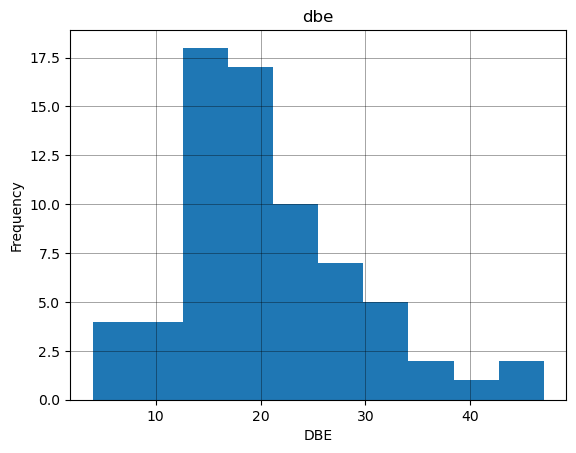

In [38]:
dbe_all.hist(column = 'dbe')
plt.xlabel("DBE")
plt.ylabel("Frequency")
plt.grid(color = 'black', linestyle ='-', linewidth = 0.5, alpha = 0.5)
plt.savefig("DBE_all_hist.png")

#make each paper a different color

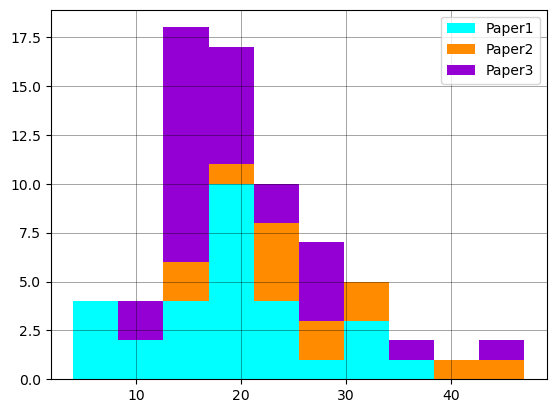

In [88]:
DBE1 = paper1['dbe']
DBE2 = paper2['dbe']
DBE3 = paper3['dbe']

plt.hist([DBE1, DBE2, DBE3], 
         color = ['cyan', 'darkorange', 'darkviolet'], label = ['Paper1', 'Paper2', 'Paper3'], stacked = True)

plt.grid(color = 'black', linestyle ='-', linewidth = 0.5, alpha = 0.5)
plt.legend()
plt.savefig('DBE_all_stacked')
plt.show()

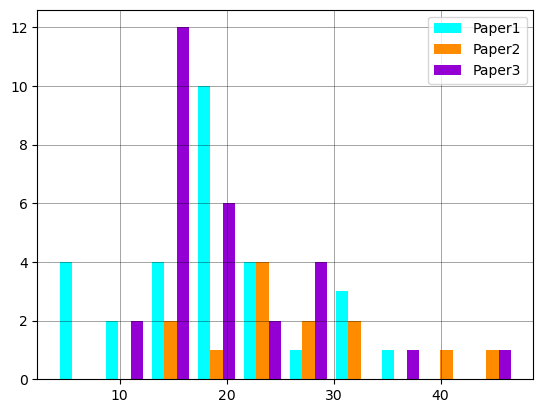

In [89]:
DBE1 = paper1['dbe']
DBE2 = paper2['dbe']
DBE3 = paper3['dbe']

plt.hist([DBE1, DBE2, DBE3], 
         color = ['cyan', 'darkorange', 'darkviolet'], label = ['Paper1', 'Paper2', 'Paper3'])

plt.grid(color = 'black', linestyle ='-', linewidth = 0.5, alpha = 0.5)
plt.legend()
plt.savefig('DBE_all_unstacked')
plt.show()

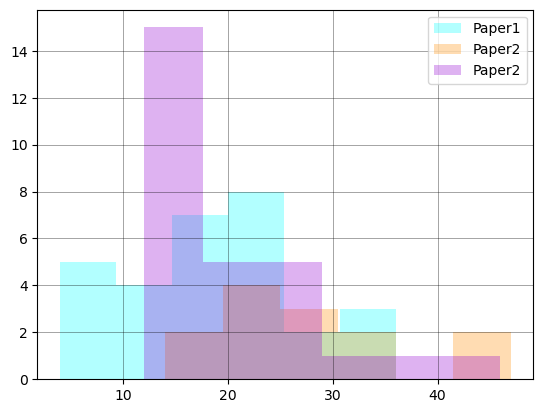

In [91]:
DBE1 = paper1['dbe']
DBE2 = paper2['dbe']
DBE3 = paper3['dbe']

plt.hist(DBE1, color = 'cyan', bins = 6, alpha = 0.3, label = 'Paper1')
plt.hist(DBE2, color = 'darkorange', bins = 6, alpha = 0.3, label = 'Paper2')
plt.hist(DBE3, color = 'darkviolet', bins = 6, alpha = 0.3, label = 'Paper2')

plt.grid(color = 'black', linestyle ='-', linewidth = 0.5, alpha = 0.5)
plt.legend()
plt.savefig('DBE_all_alpha')
plt.show()

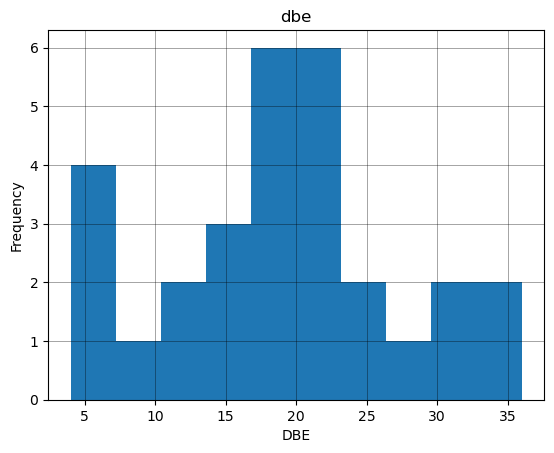

In [39]:
dbe_Paper1.hist(column = 'dbe')
plt.xlabel("DBE")
plt.ylabel("Frequency")
plt.grid(color = 'black', linestyle ='-', linewidth = 0.5, alpha = 0.5)
plt.savefig("DBE_Paper1_hist.png")

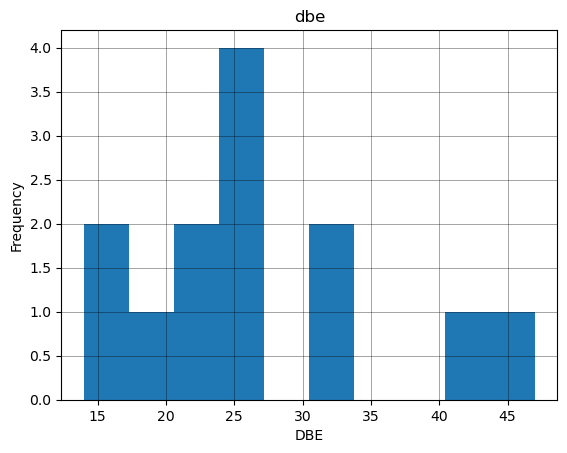

In [40]:
dbe_Paper2.hist(column = 'dbe')
plt.xlabel("DBE")
plt.ylabel("Frequency")
plt.grid(color = 'black', linestyle ='-', linewidth = 0.5, alpha = 0.5)
plt.savefig("DBE_Paper2_hist.png")

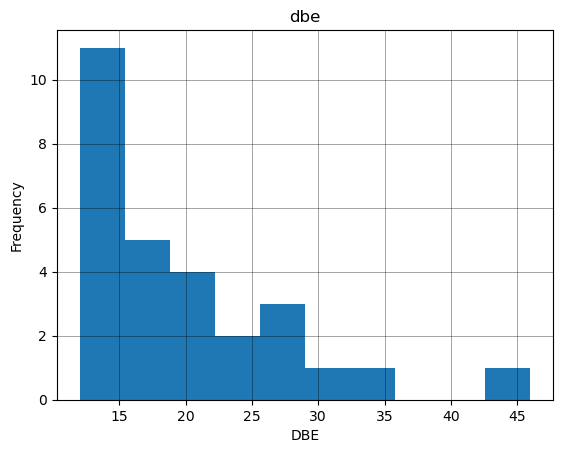

In [41]:
dbe_Paper3.hist(column = 'dbe')
plt.xlabel("DBE")
plt.ylabel("Frequency")
plt.grid(color = 'black', linestyle ='-', linewidth = 0.5, alpha = 0.5)
plt.savefig("DBE_Paper3_hist.png")

### Make Histograms of Z

In [42]:
#run sql query to get Z and the respective smiles string

sql = '''SELECT smiles_string, Z FROM trial.petroleum_draft1'''
cursor.execute(sql)

result = cursor.fetchall()
Z_all = pd.DataFrame(data = result, columns = ['smiles', 'Z'])

Z_Paper1 = Z_all.iloc[0: 29]
Z_Paper2 = Z_all.iloc[29: 42]
Z_Paper3 = Z_all.iloc[42: 70]

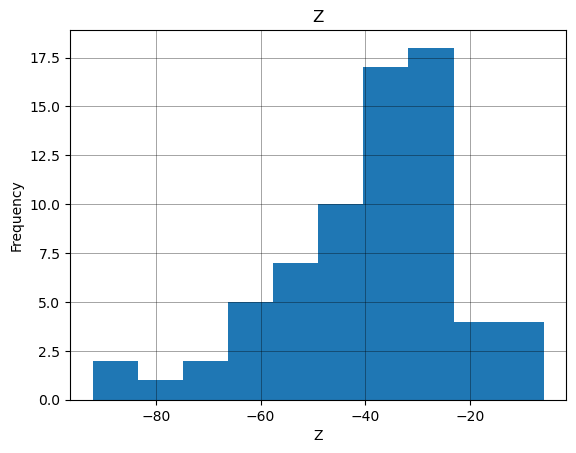

In [43]:
Z_all.hist(column = 'Z')
plt.xlabel("Z")
plt.ylabel("Frequency")
plt.grid(color = 'black', linestyle ='-', linewidth = 0.5, alpha = 0.5)
plt.savefig("Z_all_hist.png")

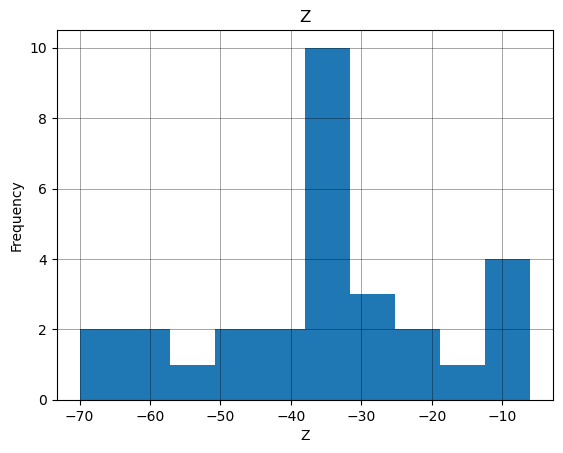

In [44]:
Z_Paper1.hist(column = 'Z')
plt.xlabel("Z")
plt.ylabel("Frequency")
plt.grid(color = 'black', linestyle ='-', linewidth = 0.5, alpha = 0.5)
plt.savefig("Z_Paper1_hist.png")

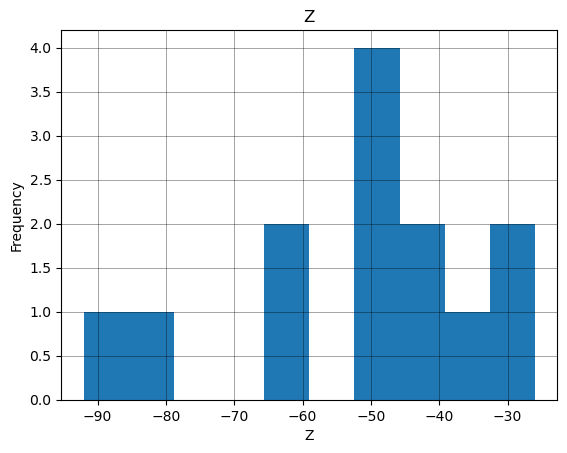

In [45]:
Z_Paper2.hist(column = 'Z')
plt.xlabel("Z")
plt.ylabel("Frequency")
plt.grid(color = 'black', linestyle ='-', linewidth = 0.5, alpha = 0.5)
plt.savefig("Z_Paper2_hist.png")

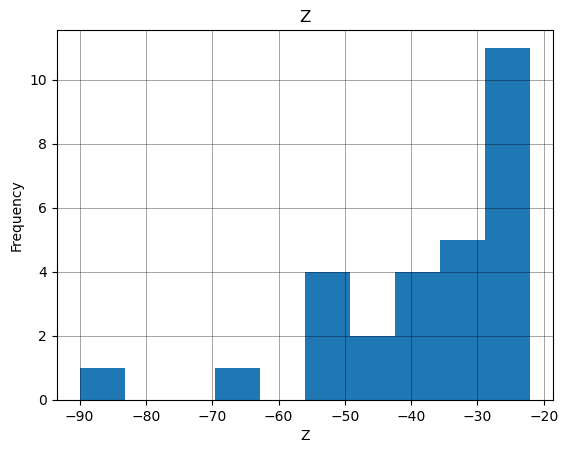

In [46]:
Z_Paper3.hist(column = 'Z')
plt.xlabel("Z")
plt.ylabel("Frequency")
plt.grid(color = 'black', linestyle ='-', linewidth = 0.5, alpha = 0.5)
plt.savefig("Z_Paper3_hist.png")

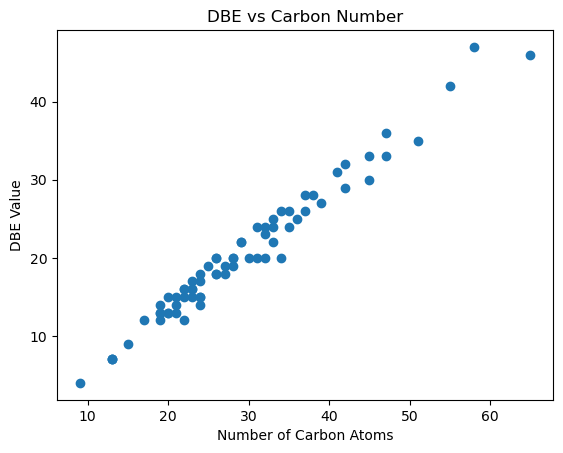

In [47]:
#run sql query to get number of dbe, number of Carbons,
#and their respective smiles string

sql = '''SELECT smiles_string, DBE, number_of_C FROM trial.petroleum_draft1'''
cursor.execute(sql)

result = cursor.fetchall()
dbe_Vs_C_all = pd.DataFrame(data = result, columns = ['smiles', 'dbe', 'number_of_C'])
x = dbe_Vs_C_all['number_of_C']
y = dbe_Vs_C_all['dbe']

scatter = plt.scatter(x,y)
ax = scatter.axes
plt.title("DBE vs Carbon Number")
plt.xlabel('Number of Carbon Atoms')
plt.ylabel('DBE Value')
plt.savefig('DBE_VS_C_graph_all.png')

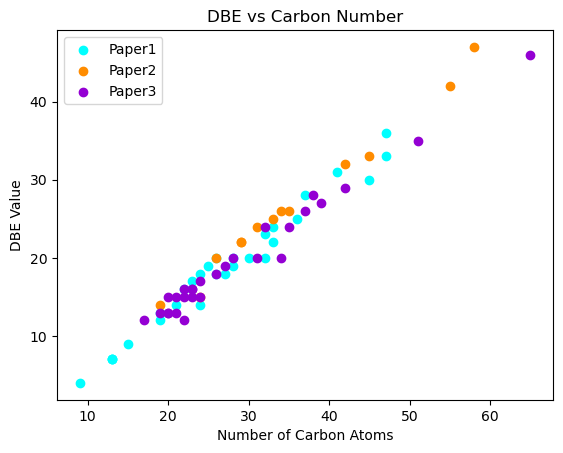

In [48]:
#  plot new and old molecules on the same graph with a color difference

x1 = paper1['number_of_C']
y1 = paper1['dbe']
x2 = paper2['number_of_C']
y2 = paper2['dbe']
x3 = paper3['number_of_C']
y3 = paper3['dbe']

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1, y1, c ='cyan', label = 'Paper1')
ax1.scatter(x2, y2, c ='darkorange', label = 'Paper2')
ax1.scatter(x3, y3, c ='darkviolet', label = 'Paper3')
plt.legend(loc = 'upper left')
plt.title("DBE vs Carbon Number")
plt.xlabel('Number of Carbon Atoms')
plt.ylabel('DBE Value')
plt.savefig('DBE_VS_C_graph_all_colored.png')
plt.show()

#  how do these compare to other asphaltenes experimentally? single molecule imaging vs. ensemble experiments


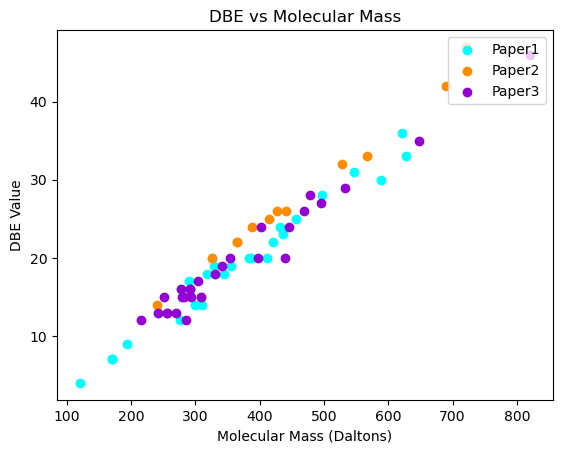

In [49]:
#plot new and old molecules on the same graph with a color difference; 

x1 = paper1['mass']
y1 = paper1['dbe']
x2 = paper2['mass']
y2 = paper2['dbe']
x3 = paper3['mass']
y3 = paper3['dbe']

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1, y1, c ='cyan', label = 'Paper1')
ax1.scatter(x2, y2, c ='darkorange', label = 'Paper2')
ax1.scatter(x3, y3, c ='darkviolet', label = 'Paper3')
plt.legend(loc = 'upper right')
plt.title("DBE vs Molecular Mass")
plt.xlabel('Molecular Mass (Daltons)')
plt.ylabel('DBE Value')
plt.savefig('DBE_VS_mass_graph_all_colored.png')
plt.show()

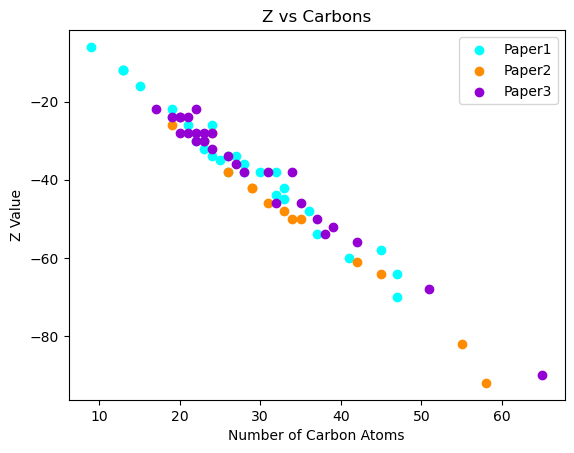

In [50]:
#  plot new and old molecules on the same graph with a color difference

x1 = paper1['number_of_C']
y1 = paper1['Z']
x2 = paper2['number_of_C']
y2 = paper2['Z']
x3 = paper3['number_of_C']
y3 = paper3['Z']

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1, y1, c ='cyan', label = 'Paper1')
ax1.scatter(x2, y2, c ='darkorange', label = 'Paper2')
ax1.scatter(x3, y3, c ='darkviolet', label = 'Paper3')
plt.legend(loc = 'upper right')
plt.title("Z vs Carbons")
plt.xlabel('Number of Carbon Atoms')
plt.ylabel('Z Value')
plt.savefig('Z_vs_Carbons_graph_all_colored.png')
plt.show()

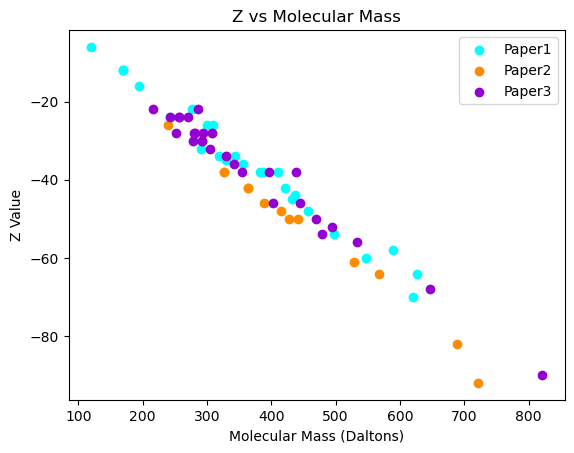

In [51]:
#  plot new and old molecules on the same graph with a color difference

x1 = paper1['mass']
y1 = paper1['Z']
x2 = paper2['mass']
y2 = paper2['Z']
x3 = paper3['mass']
y3 = paper3['Z']

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1, y1, c ='cyan', label = 'Paper1')
ax1.scatter(x2, y2, c ='darkorange', label = 'Paper2')
ax1.scatter(x3, y3, c ='darkviolet', label = 'Paper3')
plt.legend(loc = 'upper right')
plt.title("Z vs Molecular Mass")
plt.xlabel('Molecular Mass (Daltons)')
plt.ylabel('Z Value')
plt.savefig('Z_vs_mass_graph_all_colored.png')
plt.show()

In [52]:
## Create plot of logP and number of carbons

#run sql query to get number of dbe, number of Carbons,
#and their respective smiles string

sql = '''SELECT smiles_string, LogP, number_of_C, molar_mass
        FROM trial.petroleum_draft1'''
cursor.execute(sql)

result = cursor.fetchall()
logP_data = pd.DataFrame(data = result, columns = ['smiles', 'Log_P', 'number_of_C', 'molar_mass'])


carbon_all = logP_data['number_of_C']
LogP_all = logP_data['Log_P']
mass_all = logP_data['molar_mass']

LogP_Paper1 = LogP_all.iloc[0: 29]
carbon_Paper1 = carbon_all.iloc[0:29]
mass_Paper1 = mass_all.iloc[0:29]

LogP_Paper2 = LogP_all.iloc[29: 42]
carbon_Paper2 = carbon_all.iloc[29:42]
mass_Paper2 = mass_all.iloc[29:42]

LogP_Paper3 = LogP_all.iloc[42: 70]
carbon_Paper3 = carbon_all.iloc[42:70]
mass_Paper3 = mass_all.iloc[42:70]


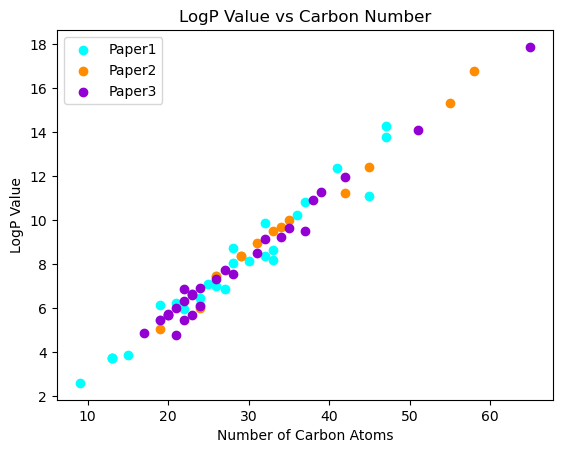

In [53]:
#plot new and old molecules on the same graph with a color difference; 

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(carbon_Paper1, LogP_Paper1, c ='cyan', label = 'Paper1')
ax1.scatter(carbon_Paper2, LogP_Paper2, c ='darkorange', label = 'Paper2')
ax1.scatter(carbon_Paper3, LogP_Paper3, c ='darkviolet', label = 'Paper3')
plt.legend(loc = 'upper left')
plt.title("LogP Value vs Carbon Number")
plt.xlabel('Number of Carbon Atoms')
plt.ylabel('LogP Value')
plt.savefig('LogP_VS_C_graph_all_colored.png')
plt.show()

#figure out which one is blue 

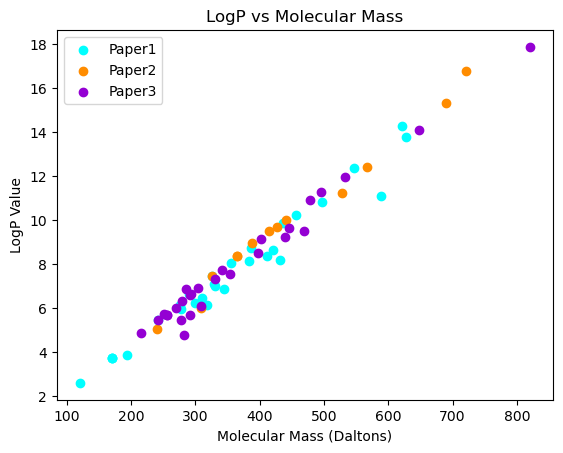

In [54]:
#plot new and old molecules on the same graph with a color difference; 

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(mass_Paper1, LogP_Paper1, c ='cyan', label = 'Paper1')
ax1.scatter(mass_Paper2, LogP_Paper2, c ='darkorange', label = 'Paper2')
ax1.scatter(mass_Paper3, LogP_Paper3, c ='darkviolet', label = 'Paper3')
plt.legend(loc = 'upper left')
plt.title("LogP vs Molecular Mass")
plt.xlabel('Molecular Mass (Daltons)')
plt.ylabel('LogP Value')
plt.savefig('LogP_vs_mass_graph_all_colored.png')
plt.show()